In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import pandas as pd
import scipy.stats as stat
import seaborn as sns
import os
import pandas
import sklearn
import ydata_profiling

In [7]:

sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))

arquivo = os.path.join('dados', '_Novas Tecnologias - Arrecadação por UF.csv')
dados = pd.read_csv(arquivo)

colunas_numericas = [
    'IMPOSTO SOBRE IMPORTAÇÃO', 'IMPOSTO SOBRE EXPORTAÇÃO', 'IPI - FUMO',
    'IPI - BEBIDAS', 'IPI - AUTOMÓVEIS', 'IPI - VINCULADO À IMPORTACAO',
    'IPI - OUTROS', 'IRPF', 'IRPJ - ENTIDADES FINANCEIRAS',
    'IRPJ - DEMAIS EMPRESAS', 'IRRF - RENDIMENTOS DO TRABALHO',
    'IRRF - RENDIMENTOS DO CAPITAL', 'IRRF - REMESSAS P/ EXTERIOR',
    'IRRF - OUTROS RENDIMENTOS', 'IMPOSTO S/ OPERAÇÕES FINANCEIRAS',
    'IMPOSTO TERRITORIAL RURAL', 'CPMF', 'COFINS'
]

colunas_numericas_ajustadas = [coluna for coluna in colunas_numericas if coluna in dados.columns]

for coluna in colunas_numericas_ajustadas:
    dados[coluna] = pd.to_numeric(dados[coluna].str.replace('.', '', regex=False).str.replace(',', '.', regex=False), errors='coerce')

# dados_somados = dados.groupby('UF')[colunas_numericas_ajustadas].sum()

dados['TOTAL_ARRECADADO'] = dados[colunas_numericas_ajustadas].sum(axis=1)

# Agrupar os dados por 'UF' e somar as colunas numéricas
dados_somados = dados.groupby('UF')[colunas_numericas_ajustadas + ['TOTAL_ARRECADADO']].sum()

dados_somados


,IMPOSTO SOBRE IMPORTAÇÃO,IMPOSTO SOBRE EXPORTAÇÃO,IPI - FUMO,IPI - BEBIDAS,IPI - AUTOMÓVEIS,IPI - VINCULADO À IMPORTACAO,IPI - OUTROS,IRPF,IRPJ - ENTIDADES FINANCEIRAS,IRPJ - DEMAIS EMPRESAS,IRRF - RENDIMENTOS DO TRABALHO,IRRF - RENDIMENTOS DO CAPITAL,IRRF - REMESSAS P/ EXTERIOR,IRRF - OUTROS RENDIMENTOS,IMPOSTO S/ OPERAÇÕES FINANCEIRAS,IMPOSTO TERRITORIAL RURAL,CPMF,COFINS,TOTAL_ARRECADADO
UF,,,,,,,,,,,,,,,,,,,
AC,6.233261e+06,9.226220e+05,3.473433e+07,1.948278e+07,1.470811e+06,9.599868e+06,1.164689e+07,8.932849e+08,9.124230e+05,1.619449e+09,1.423719e+09,9.537652e+07,1.223126e+07,9.038737e+07,4.257472e+07,2.003020e+07,7.697306e+06,6.331832e+07,4.353071e+09
AL,8.024062e+08,3.055808e+06,1.416634e+08,1.789998e+08,6.495886e+05,2.377178e+08,1.105775e+09,3.682412e+09,6.023636e+06,5.444113e+09,5.480130e+09,4.160797e+08,9.690140e+07,3.923235e+08,1.113238e+08,7.706615e+07,1.476459e+07,3.161353e+08,1.850754e+10
AM,1.173158e+10,3.175777e+05,1.742951e+08,7.426629e+08,9.567117e+06,2.396583e+09,1.319749e+09,3.820978e+09,1.098353e+08,3.329089e+10,1.548876e+10,1.573622e+09,5.259567e+09,1.283048e+09,7.889332e+08,4.553232e+07,4.289088e+07,2.555729e+09,8.063454e+10
AP,3.400803e+07,1.865196e+04,5.657959e+07,6.560232e+05,2.313262e+06,3.932388e+07,4.136840e+07,7.722244e+08,3.504641e+05,1.508882e+09,1.523805e+09,2.031876e+07,1.805705e+07,6.857497e+07,2.319988e+07,2.015604e+07,3.944117e+03,7.221426e+07,4.202055e+09
BA,1.431568e+10,2.792314e+07,6.669423e+08,3.731323e+09,8.137668e+08,1.052052e+10,1.455047e+10,1.432016e+10,2.277134e+09,4.320968e+10,2.986121e+10,3.941798e+09,3.656791e+09,3.388270e+09,1.018856e+09,8.209784e+08,5.844715e+08,3.286255e+09,1.509922e+11
CE,9.714864e+09,5.133874e+06,3.655718e+08,2.328807e+09,3.194107e+07,3.778711e+09,3.218768e+09,8.938107e+09,5.219306e+09,2.757999e+10,2.325479e+10,3.951971e+09,2.133544e+09,2.086723e+09,1.257796e+09,8.319278e+07,5.051949e+08,1.436924e+09,9.589133e+10
DF,8.615418e+08,4.956208e+05,3.901966e+08,6.664183e+08,1.055130e+06,4.160013e+08,3.150711e+09,1.523142e+10,4.770388e+10,1.355791e+11,5.256405e+11,9.162767e+10,2.356894e+10,3.667799e+10,1.033414e+11,6.370201e+07,4.681387e+10,6.290713e+09,1.038026e+12
ES,4.097144e+10,7.209326e+07,4.054167e+08,3.974314e+08,2.897787e+09,3.073654e+10,1.111491e+10,8.339021e+09,1.081061e+09,3.398272e+10,1.590922e+10,3.071162e+09,2.460048e+09,1.812958e+09,2.311161e+09,1.632419e+08,1.630872e+07,1.819027e+09,1.575615e+11
GO,1.009697e+10,1.056817e+07,5.019703e+08,1.887750e+09,2.139620e+09,4.436906e+09,4.676953e+09,1.420492e+10,1.382549e+08,3.524944e+10,1.941827e+10,2.712489e+09,1.085979e+09,1.498592e+09,1.566112e+09,2.388603e+09,1.979282e+08,1.740165e+09,1.039515e+11


In [14]:
dados[['IMPOSTO SOBRE IMPORTAÇÃO', 'CPMF', 'IMPOSTO SOBRE EXPORTAÇÃO']].describe()

,IMPOSTO SOBRE IMPORTAÇÃO,CPMF,IMPOSTO SOBRE EXPORTAÇÃO
count,7.576000e+03,7.619000e+03,7.812000e+03
mean,8.843170e+07,2.216815e+07,6.410363e+05
std,2.602518e+08,1.537094e+08,2.171724e+07
min,-5.915950e+05,-3.496452e+06,-3.379762e+06
25%,1.455566e+05,0.000000e+00,0.000000e+00
50%,4.568057e+06,0.000000e+00,3.243250e+02
75%,6.108894e+07,1.137684e+05,8.588267e+03
max,2.795288e+09,2.332493e+09,1.206944e+09


<Axes: xlabel='UF'>

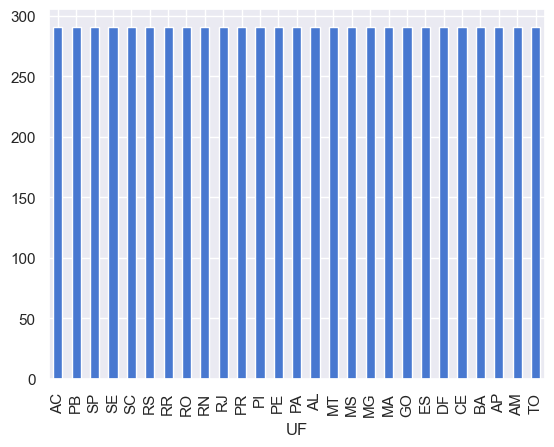

In [18]:
dados.UF.value_counts().plot.bar()

In [19]:
dados.UF.value_counts()

UF
AC    291
PB    291
SP    291
SE    291
SC    291
RS    291
RR    291
RO    291
RN    291
RJ    291
PR    291
PI    291
PE    291
PA    291
AL    291
MT    291
MS    291
MG    291
MA    291
GO    291
ES    291
DF    291
CE    291
BA    291
AP    291
AM    291
TO    291
Name: count, dtype: int64

In [22]:
dados.isnull().sum()

Ano                                   0
Mês                                   0
UF                                    0
IMPOSTO SOBRE IMPORTAÇÃO            281
IMPOSTO SOBRE EXPORTAÇÃO             45
IPI - FUMO                          292
IPI - BEBIDAS                       292
IPI - AUTOMÓVEIS                    115
IPI - VINCULADO À IMPORTACAO        239
IPI - OUTROS                        261
IRPF                                304
IRPJ - ENTIDADES FINANCEIRAS        147
IRPJ - DEMAIS EMPRESAS              381
IRRF - RENDIMENTOS DO TRABALHO      375
IRRF - RENDIMENTOS DO CAPITAL       216
IRRF - REMESSAS P/ EXTERIOR         183
IRRF - OUTROS RENDIMENTOS           217
IMPOSTO S/ OPERAÇÕES FINANCEIRAS    162
IMPOSTO TERRITORIAL RURAL            61
CPMF                                238
COFINS                              452
TOTAL_ARRECADADO                      0
dtype: int64

In [23]:
dados.isnull().sum().sum(0)

4261

In [ ]:
dados[dados.isnull().any(axis=1)]

In [26]:
dadosLimpos = dados.dropna()
dadosLimpos

,Ano,Mês,UF,IMPOSTO SOBRE IMPORTAÇÃO,IMPOSTO SOBRE EXPORTAÇÃO,IPI - FUMO,IPI - BEBIDAS,IPI - AUTOMÓVEIS,IPI - VINCULADO À IMPORTACAO,IPI - OUTROS,IRPF,IRPJ - ENTIDADES FINANCEIRAS,IRPJ - DEMAIS EMPRESAS,IRRF - RENDIMENTOS DO TRABALHO,IRRF - RENDIMENTOS DO CAPITAL,IRRF - REMESSAS P/ EXTERIOR,IRRF - OUTROS RENDIMENTOS,IMPOSTO S/ OPERAÇÕES FINANCEIRAS,IMPOSTO TERRITORIAL RURAL,CPMF,COFINS,TOTAL_ARRECADADO
0,2000,Janeiro,AC,2.310000e+02,0.00,292096.00,0.00,0.000000e+00,1.670000e+02,1.558000e+03,1.771970e+05,6.430000e+02,6.768350e+05,1.084940e+06,2.765200e+04,5.700000e+02,3.089400e+04,1.220000e+03,28447.00,103.0,1770475.0,4.093028e+06
1,2000,Janeiro,AL,4.750880e+05,33873.00,1329338.00,812470.00,0.000000e+00,1.417350e+05,3.676847e+06,4.608040e+05,5.610000e+02,2.672106e+06,4.454947e+06,5.440560e+05,1.913820e+05,3.095730e+05,2.693900e+04,4252539.00,97248.0,7493570.0,2.697308e+07
2,2000,Janeiro,AM,1.167940e+07,0.00,1507146.00,1791471.00,2.779600e+04,4.414483e+06,1.800346e+06,7.006230e+05,9.082800e+04,1.005871e+07,1.017472e+07,1.241708e+06,3.580022e+06,1.029164e+06,8.438810e+05,40171.00,832562.0,44000981.0,9.381402e+07
3,2000,Janeiro,AP,2.426700e+04,0.00,424862.00,1419.00,3.210000e+02,2.233300e+04,1.216500e+04,1.392260e+05,4.413500e+04,5.865720e+05,1.444486e+06,2.050310e+05,5.825000e+03,3.460200e+04,6.999000e+03,6477.00,0.0,1682102.0,4.640822e+06
4,2000,Janeiro,BA,1.047646e+07,13.00,5542123.00,11533707.00,0.000000e+00,7.496476e+06,2.374386e+07,2.498647e+06,1.773780e+05,2.569570e+07,2.727702e+07,1.337480e+07,2.302766e+06,2.022200e+06,1.218485e+06,2446535.00,11923442.0,81027229.0,2.287568e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7852,2024,Março,RR,4.176311e+04,0.00,0.00,0.00,0.000000e+00,1.313218e+04,8.405307e+04,2.931498e+06,3.858670e+03,1.035559e+07,1.296915e+07,3.032121e+05,2.007814e+04,8.286758e+05,1.256391e+05,115602.22,0.0,0.0,2.779224e+07
7853,2024,Março,SC,1.145658e+09,-2721.89,82.76,10385020.78,3.971773e+07,4.199974e+08,3.143088e+08,9.483545e+07,1.801126e+07,7.018191e+08,4.223393e+08,9.516803e+07,5.891456e+07,3.185204e+07,8.297521e+07,951322.26,0.0,0.0,3.436930e+09
7854,2024,Março,SP,1.778419e+09,38203.15,2386842.27,51120764.98,2.273373e+08,5.498449e+08,1.233497e+09,7.106990e+08,1.527903e+09,7.063112e+09,7.309524e+09,6.538369e+09,2.754760e+09,8.540057e+08,3.544201e+09,18847271.31,0.0,0.0,3.416406e+10
7855,2024,Março,SE,5.666047e+06,1872.38,330971.37,1262320.15,0.000000e+00,1.161892e+06,8.561310e+06,1.039469e+07,2.975598e+06,3.226274e+07,3.525751e+07,4.082837e+06,1.676212e+06,3.330496e+06,5.288795e+06,77990.46,0.0,0.0,1.123313e+08


In [27]:
dadosLimpos.isnull().sum()

Ano                                 0
Mês                                 0
UF                                  0
IMPOSTO SOBRE IMPORTAÇÃO            0
IMPOSTO SOBRE EXPORTAÇÃO            0
IPI - FUMO                          0
IPI - BEBIDAS                       0
IPI - AUTOMÓVEIS                    0
IPI - VINCULADO À IMPORTACAO        0
IPI - OUTROS                        0
IRPF                                0
IRPJ - ENTIDADES FINANCEIRAS        0
IRPJ - DEMAIS EMPRESAS              0
IRRF - RENDIMENTOS DO TRABALHO      0
IRRF - RENDIMENTOS DO CAPITAL       0
IRRF - REMESSAS P/ EXTERIOR         0
IRRF - OUTROS RENDIMENTOS           0
IMPOSTO S/ OPERAÇÕES FINANCEIRAS    0
IMPOSTO TERRITORIAL RURAL           0
CPMF                                0
COFINS                              0
TOTAL_ARRECADADO                    0
dtype: int64

In [28]:
print("antes:",len(dados),"depois:",len(dadosLimpos))

antes: 7857 depois: 7405


In [29]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Ano                               7857 non-null   int64  
 1   Mês                               7857 non-null   object 
 2   UF                                7857 non-null   object 
 3   IMPOSTO SOBRE IMPORTAÇÃO          7576 non-null   float64
 4   IMPOSTO SOBRE EXPORTAÇÃO          7812 non-null   float64
 5   IPI - FUMO                        7565 non-null   float64
 6   IPI - BEBIDAS                     7565 non-null   float64
 7   IPI - AUTOMÓVEIS                  7742 non-null   float64
 8   IPI - VINCULADO À IMPORTACAO      7618 non-null   float64
 9   IPI - OUTROS                      7596 non-null   float64
 10  IRPF                              7553 non-null   float64
 11  IRPJ - ENTIDADES FINANCEIRAS      7710 non-null   float64
 12  IRPJ -

In [30]:
proporcaoDadosFaltantes = (dados.isnull().sum()/len(dados))
proporcaoDadosFaltantes

Ano                                 0.000000
Mês                                 0.000000
UF                                  0.000000
IMPOSTO SOBRE IMPORTAÇÃO            0.035764
IMPOSTO SOBRE EXPORTAÇÃO            0.005727
IPI - FUMO                          0.037164
IPI - BEBIDAS                       0.037164
IPI - AUTOMÓVEIS                    0.014637
IPI - VINCULADO À IMPORTACAO        0.030419
IPI - OUTROS                        0.033219
IRPF                                0.038692
IRPJ - ENTIDADES FINANCEIRAS        0.018709
IRPJ - DEMAIS EMPRESAS              0.048492
IRRF - RENDIMENTOS DO TRABALHO      0.047728
IRRF - RENDIMENTOS DO CAPITAL       0.027491
IRRF - REMESSAS P/ EXTERIOR         0.023291
IRRF - OUTROS RENDIMENTOS           0.027619
IMPOSTO S/ OPERAÇÕES FINANCEIRAS    0.020619
IMPOSTO TERRITORIAL RURAL           0.007764
CPMF                                0.030291
COFINS                              0.057528
TOTAL_ARRECADADO                    0.000000
dtype: flo

In [31]:
proporcaoDadosFaltantes == 0

Ano                                  True
Mês                                  True
UF                                   True
IMPOSTO SOBRE IMPORTAÇÃO            False
IMPOSTO SOBRE EXPORTAÇÃO            False
IPI - FUMO                          False
IPI - BEBIDAS                       False
IPI - AUTOMÓVEIS                    False
IPI - VINCULADO À IMPORTACAO        False
IPI - OUTROS                        False
IRPF                                False
IRPJ - ENTIDADES FINANCEIRAS        False
IRPJ - DEMAIS EMPRESAS              False
IRRF - RENDIMENTOS DO TRABALHO      False
IRRF - RENDIMENTOS DO CAPITAL       False
IRRF - REMESSAS P/ EXTERIOR         False
IRRF - OUTROS RENDIMENTOS           False
IMPOSTO S/ OPERAÇÕES FINANCEIRAS    False
IMPOSTO TERRITORIAL RURAL           False
CPMF                                False
COFINS                              False
TOTAL_ARRECADADO                     True
dtype: bool

In [33]:
sum(proporcaoDadosFaltantes == 0)

4

In [32]:
dados.columns[proporcaoDadosFaltantes == 0]

Index(['Ano', 'Mês', 'UF', 'TOTAL_ARRECADADO'], dtype='object')

In [34]:
x = np.linspace(0, 10, 100)
x_ = np.linspace(0, 10, 10)

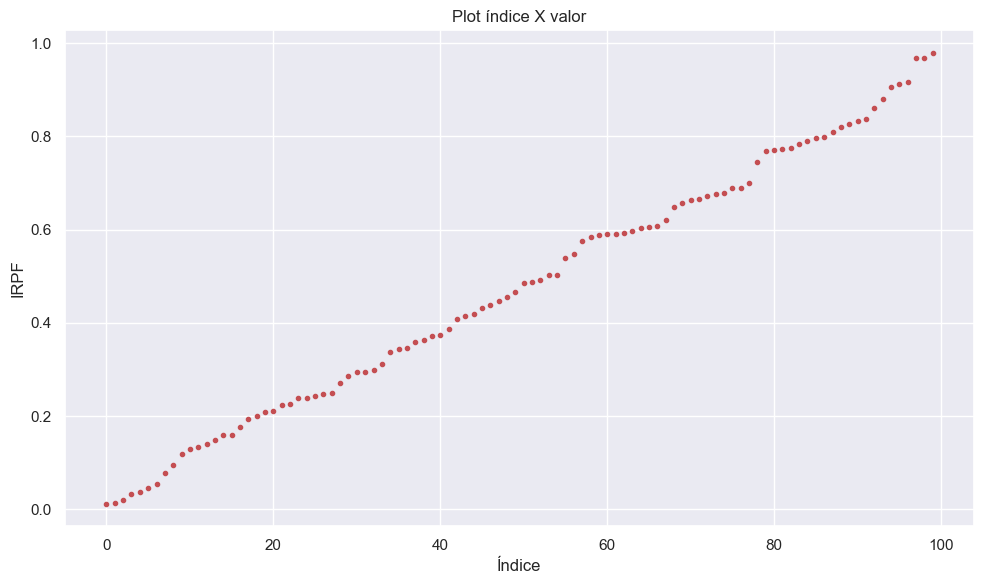

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Correcting the DataFrame creation
dados = pd.DataFrame({
    'IRPF': np.random.rand(100),
    'IMPOSTO SOBRE IMPORTAÇÃO': np.random.rand(100),
    'IMPOSTO SOBRE EXPORTAÇÃO': np.random.rand(100)
})  # Example DataFrame

plt.subplots(figsize=(10, 6))
plt.plot(range(len(dados)), dados['IRPF'].sort_values().values, 'r.')
plt.xlabel('Índice')
plt.ylabel('IRPF')  # Assuming IRPF refers to a tax-related value
plt.title('Plot índice X valor')
plt.grid(True)
plt.tight_layout()
plt.show()
